**1) 데이터 선정 이유 및 문제 정의**
- 데이터 선택 이유
- 분류/회귀 check 

**2) 데이터를 이용한 가설 및 평가지표, 베이스라인 선택**
- 가설 
- target으로 선정 이유
- 베이스라인 모델과 평가지표 선택 이유

**3) EDA와 데이터 전처리**
- 데이터의 탐색 및 가공
- EDA
- Feature Engineering
- 데이터의 정규화
- 노이즈 제거
- 결측치 제거 혹은 대체
- 데이터 밸런스
- Data Leakage확인 및 처리
- 모델의 유용성, 한계점

**4) 머신러닝 방식 적용 및 교차검증**
- 모델링과 베이스라인 성능 비교
-  Linear / Tree-based / Ensemble 모델을 학습 (다양하게 시도 ㅊㅊ)
- 평가지표 베이스라인과 비교
- 교차 검증 통해 일반화될 가능성 확인
- 모델 성능을 개선
o Hyperparameter tuning, etc.
- 최소 2개 이상의 모델을 만들어서 validation 점수를 보고
- 최종 모델의 test 점수를 보고하세요.
-  모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
- 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
- 최종 모델에 관해 설명하세요.

**5) 머신러닝 모델 해석**
- SHAP, PDP 등을 통해서 모델이 관측치를 어떤 특성을 활용했거나, 어떤 특성이 타겟에 영향을 끼쳤는지 등을 해석
- PDP, SHAP을 활용하여 최종 모델을 설명
- 시각화는 "설명"이 제일 중요합니다.
- 모델이 관측치를 예측하기 위해서 어떤 특성을 활용?
- 어떤 특성이 있다면 모델의 예측에 도움? 해당 특성은 어떻게 구할 수 있을까?



**1) 데이터 선정 이유 및 문제 정의**

1. 데이터 선택 이유
2. 분류/회귀 check

In [ ]:
# 1) 데이터 선정 이유 및 문제 정의
# 1.데이터 선택 이유 : application(신청자)의 신용카드 신청이 Approved/Denied 예측
# 2.Target : Good/Bad customers 이기에 분류 문제 

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
application = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project02/archive/application_record.csv')
credit = pd.read_csv('/content/drive/MyDrive/Codestates AI06/project02/archive/credit_record.csv')


Mounted at /content/drive


In [ ]:
# 1-1) Data Description 
'''
application.columns

'ID': Client Number
'CODE_GENDER': Gender 
'FLAG_OWN_CAR': Car own
'FLAG_OWN_REALTY': Property own
'CNT_CHILDREN': Number of Children
'AMT_INCOME_TOTAL': Annual Income
'NAME_INCOME_TYPE': Income Category
'NAME_EDUCATION_TYPE': Edcuation Level
'NAME_FAMILY_STATUS': Maritial Status
'NAME_HOUSING_TYPE': Way of Living
'DAYS_BIRTH': Birthday(Count backwards from current day eg. 01 means yday)
'DAYS_EMPLOYED': Start date of employment (as above, if positive currently unemplyed) 
'FLAG_MOBIL': Mobile phone own 
'FLAG_WORK_PHONE': Work phone own
'FLAG_PHONE': Phone own
'FLAG_EMAIL': Email own
'OCCUPATION_TYPE': Occupation 
'CNT_FAM_MEMBERS': Family size 


credit.columns

'ID': Client Number
'MONTHS_BALANCE': Record month, 
the month of the extracted data is the starting point backwards, 
0 is the current month, -1 is the previous month, and so on
'STATUS': Status,
C: paid off that month 
X: No loan for the month 
0: 1-29days past due
1: 30-59days past due
2: 60-89days overdue
3: 90-119days overdue
4: 120-149 days overdue
5: Overdue or bad debts
write-offs for more than 150days 

'''

"\napplication.columns\n\n'ID': Client Number\n'CODE_GENDER': Gender \n'FLAG_OWN_CAR': Car own\n'FLAG_OWN_REALTY': Property own\n'CNT_CHILDREN': Number of Children\n'AMT_INCOME_TOTAL': Annual Income\n'NAME_INCOME_TYPE': Income Category\n'NAME_EDUCATION_TYPE': Edcuation Level\n'NAME_FAMILY_STATUS': Maritial Status\n'NAME_HOUSING_TYPE': Way of Living\n'DAYS_BIRTH': Birthday(Count backwards from current day eg. 01 means yday)\n'DAYS_EMPLOYED': Start date of employment (as above, if positive currently unemplyed) \n'FLAG_MOBIL': Mobile phone own \n'FLAG_WORK_PHONE': Work phone own\n'FLAG_PHONE': Phone own\n'FLAG_EMAIL': Email own\n'OCCUPATION_TYPE': Occupation \n'CNT_FAM_MEMBERS': Family size \n\n\ncredit.columns\n\n'ID': Client Number\n'MONTHS_BALANCE': Record month, \nthe month of the extracted data is the starting point backwards, \n0 is the current month, -1 is the previous month, and so on\n'STATUS': Status,\n0: 1-29days past due\n1: 30-59days past due\n2: 60-89days overdue\n3: 90-119d

In [ ]:
# 1-2) Application, Record 데이터 기본 정보 정리
print("Application data set shape:", application.shape)
print("Credit Record data set shape:", credit.shape)

Application data set shape: (438557, 18)
Credit Record data set shape: (1048575, 3)


In [ ]:
# 데이터 전전처리
# Customer Good/Bad 기준 잡기 및 전처리 

credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [ ]:
# Good Client = 0 , Bad Clinet = 1

'''

1.2 Credit record
This is a csv file with credit record for a part of ID in application record. We can treat it a file to generate labels for modeling. For the applicants who have a record more than 59 past due, they should be rejected.
기준표 
C: paid off that month 
X: No loan for the month 
0: 1-29days past due


C, X, 0은 1달 이내로 대출상환한 고객이라, Good Client(0)로 분류 

1: 30-59days past due
2: 60-89days overdue
3: 90-119days overdue
4: 120-149 days overdue
5: Overdue or bad debts
write-offs for more than 150days 

그 외의 1, 2, 3, 4, 5은 1달 이상 연체된 고객이라, Bad Client(1)으로 분류

'''


credit['STATUS'].replace(['C', 'X'], 0, inplace=True)
credit['STATUS'].replace(['1', '2', '3', '4', '5'], 1, inplace=True)
credit['STATUS'] = credit['STATUS'].astype('int')

In [ ]:
credit['STATUS'].value_counts(normalize=True)*100

##불균형 데이터인 것 재확인 

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [ ]:
#credit_trans =credit.groupby('ID').agg(max).reset_index()

In [ ]:
#credit_trans['STATUS'].value_counts(normalize=True)*100

**2) 데이터를 이용한 가설 및 평가지표, 베이스라인 선택**

1. 가설
2. target으로 선정 이유
3. 베이스라인 모델과 평가지표 선택 이유

**3) EDA와 데이터 전처리**
- 데이터의 탐색 및 가공
- EDA
- Feature Engineering
- 데이터의 정규화
- 노이즈 제거
- 결측치 제거 혹은 대체
- 데이터 밸런스
- Data Leakage확인 및 처리
- 모델의 유용성, 한계점

In [ ]:
# Record, Applicant 'ID'베이스로 합치기
df = pd.merge(application, credit, on='ID', how='inner')
df.shape

(777715, 20)

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,0


In [ ]:
# 중복 처리 
df = df.drop_duplicates(subset='ID', keep ='first', inplace = False)

df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head()

(36457, 20)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0


In [ ]:
'''
!pip install pandas-profiling==2.7.1
from pandas_profiling import ProfileReport
 
profile = ProfileReport(df)
profile
'''

'\n!pip install pandas-profiling==2.7.1\nfrom pandas_profiling import ProfileReport\n \nprofile = ProfileReport(df)\nprofile\n'

In [ ]:
#profiling 결과 
#FLAG_MOBIL has constant value "1"	=> drop 
#OCCUPATION_TYPE has 240048 (30.9%) missing values => 파고들기 
#CNT_CHILDREN has 540639 (69.5%) zeros => 값 0 
#MONTHS_BALANCE has 24672 (3.2%) zeros => 값 0 

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
#FLAG_MOBIL has constant value "1"	=> drop 
df = df.drop(columns='FLAG_MOBIL')

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,-22,0


In [ ]:
#OCCUPATION_TYPE has 240048 (30.9%) missing values => 파고들기 

otsum = df['OCCUPATION_TYPE'].value_counts().sum()
otnsum = df['OCCUPATION_TYPE'].isnull().sum()

print("OCCUPATION TYPE 총 데이터 수", df['OCCUPATION_TYPE'].value_counts().sum())
print(df['OCCUPATION_TYPE'].value_counts())
print("OCCUPATION TYPE 결측치 :", df['OCCUPATION_TYPE'].isnull().sum())

OCCUPATION TYPE 총 데이터 수 25134
Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64
OCCUPATION TYPE 결측치 : 11323


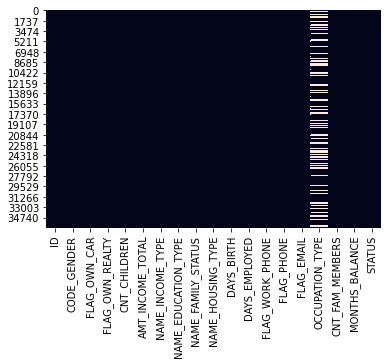

In [ ]:
%matplotlib inline 
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)

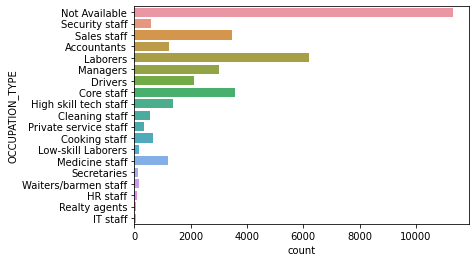

(36457, 18)

In [ ]:
# OCCUPATION TYPE 중 결측치를 'Not Available'로 채우고 표를 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Not Available')
sns.countplot(y=df['OCCUPATION_TYPE'])
plt.show();

# 매우 아쉽게도, 결측치가 너무 많아 삭제하는 것으로 한다. 
df = df.drop(columns=['OCCUPATION_TYPE'])
df.shape

In [ ]:
#CNT_CHILDREN has 540639 (69.5%) zeros => 값 0 
df['CNT_CHILDREN'].value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64

In [ ]:
#MONTHS_BALANCE has 24672 (3.2%) zeros => 값 0 
df['MONTHS_BALANCE'].value_counts()

#데이터를 언제 뽑았는지에 대한 값이기에 target과 관계 없음 
df = df.drop(columns=['MONTHS_BALANCE'])
df.shape

(36457, 17)

In [ ]:
#'ID': Client Number
#'CODE_GENDER': Gender 
#'FLAG_OWN_CAR': Car own
#'FLAG_OWN_REALTY': Property own
#'CNT_CHILDREN': Number of Children
#'AMT_INCOME_TOTAL': Annual Income
#'NAME_INCOME_TYPE': Income Category
#'NAME_EDUCATION_TYPE': Edcuation Level
#'NAME_FAMILY_STATUS': Maritial Status
#'NAME_HOUSING_TYPE': Way of Living
#'DAYS_BIRTH': Birthday(Count backwards from current day eg. 01 means yday)
#DAYS_EMPLOYED': Start date of employment (as above, if positive currently unemplyed) 
#'FLAG_WORK_PHONE': Work phone own
#'FLAG_PHONE': Phone own
#'FLAG_EMAIL': Email own
#'OCCUPATION_TYPE': Occupation 
#'CNT_FAM_MEMBERS': Family size 

0    24430
1    12027
Name: CODE_GENDER, dtype: int64


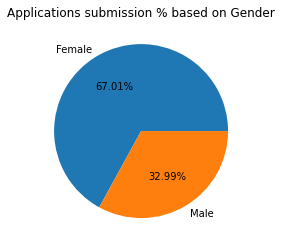

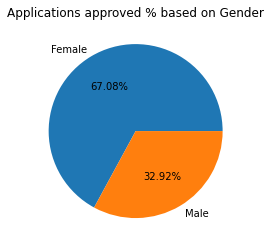

In [ ]:
#'CODE_GENDER': Gender
df['CODE_GENDER'].replace(['F'], 0, inplace=True)
df['CODE_GENDER'].replace(['M'], 1, inplace=True)
print(df['CODE_GENDER'].value_counts())

# 2:1 비율로 여성 신청자의 수가 많다.
plt.pie(df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('Applications submission % based on Gender')
plt.show();

# 2:1 비율로 신용카드 발급이 승인된 수가 많다.
plt.pie(df[df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('Applications approved % based on Gender')
plt.show()



CAR Y/N: 
 0    22614
1    13843
Name: FLAG_OWN_CAR, dtype: int64


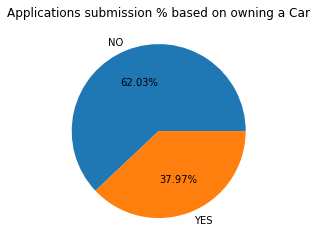

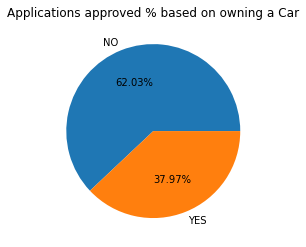

In [ ]:
#'FLAG_OWN_CAR': Car own
df['FLAG_OWN_CAR'].replace(['N'], 0, inplace=True)
df['FLAG_OWN_CAR'].replace(['Y'], 1, inplace=True)
print("CAR Y/N: \n", df['FLAG_OWN_CAR'].value_counts())
plt.show();

# 2:1 비율로 차가 없는 신청자의 수가 많다.
plt.pie(df['FLAG_OWN_CAR'].value_counts(), labels=['NO', 'YES'],autopct='%1.2f%%')
plt.title('Applications submission % based on owning a Car')
plt.show();

# 2:1 비율로 차가 없는 사람의 신용카드 발급이 승인된 수가 많다.
plt.pie(df[df['STATUS']==0]['FLAG_OWN_CAR'].value_counts(), labels=['NO', 'YES'], autopct='%1.2f%%')
plt.title('Applications approved % based on owning a Car')
plt.show()



FLAG_OWN_REALTY Y/N:
 1    24506
0    11951
Name: FLAG_OWN_REALTY, dtype: int64


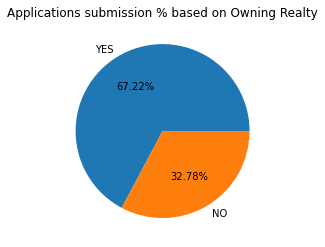

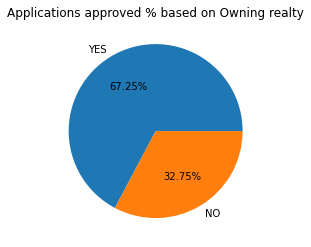

In [ ]:
df['FLAG_OWN_REALTY'].replace(['N'], 0, inplace=True)
df['FLAG_OWN_REALTY'].replace(['Y'], 1, inplace=True)
print("\n\nFLAG_OWN_REALTY Y/N:\n", df['FLAG_OWN_REALTY'].value_counts())

# 2:1 비율로 부동산이 신청자의 수가 많다.
plt.pie(df['FLAG_OWN_REALTY'].value_counts(), labels=['YES', 'NO'], autopct='%1.2f%%')
plt.title('Applications submission % based on Owning Realty')
plt.show();

# 2:1 비율로 부동산이 있는 신청자의 신용카드 발급이 승인된 수가 많다.
plt.pie(df[df['STATUS']==0]['FLAG_OWN_REALTY'].value_counts(), labels=['YES', 'NO'], autopct='%1.2f%%')
plt.title('Applications approved % based on Owning realty')
plt.show()

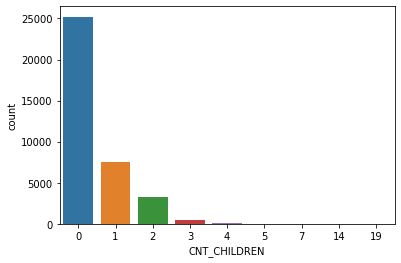

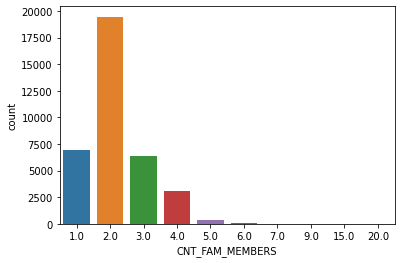

In [ ]:
#'CNT_CHILDREN': Number of Children
#'CNT_FAM_MEMBERS': Family size


sns.countplot( x=df['CNT_CHILDREN'])
plt.show();

sns.countplot( x=df['CNT_FAM_MEMBERS'])
plt.show();


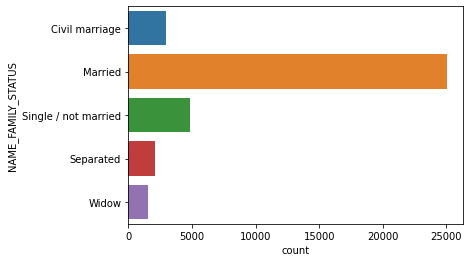

In [ ]:
#'AMT_INCOME_TOTAL': Annual Income & Family Status
# 범주형데이터 중 순서형 변수로 변경

sns.countplot( y=df['NAME_FAMILY_STATUS'])
plt.show();

In [ ]:
#'NAME_FAMILY_STATUS': Maritial Status
# => 연간 수입과 기/미혼 여부 따른 순위 분류 

dffs = df.groupby(['NAME_FAMILY_STATUS']).mean().sort_values(['AMT_INCOME_TOTAL'], ascending=False)
print(dffs['AMT_INCOME_TOTAL'])

#그다지 차이가 안나오므로, drop 결정
df = df.drop(columns=['NAME_FAMILY_STATUS'])

NAME_FAMILY_STATUS
Single / not married    192742.889211
Separated               192101.090585
Married                 186692.723990
Civil marriage          182582.876231
Widow                   167932.098564
Name: AMT_INCOME_TOTAL, dtype: float64


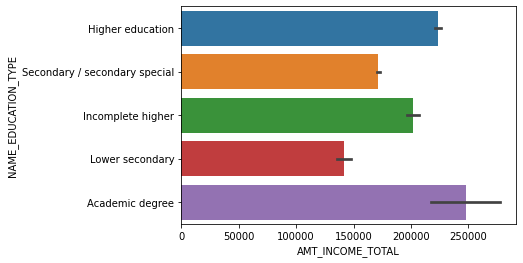

In [ ]:
#'AMT_INCOME_TOTAL': Annual Income & eudcation type 
# 범주형데이터 중 순서형 변수로 변경

sns.barplot(x=df.AMT_INCOME_TOTAL, y=df.NAME_EDUCATION_TYPE)
plt.show();

In [ ]:
dffs = df.groupby(['NAME_EDUCATION_TYPE']).mean().sort_values(['AMT_INCOME_TOTAL'], ascending=False)
print(dffs['AMT_INCOME_TOTAL'])


NAME_EDUCATION_TYPE
0    247500.000000
1    223733.666058
2    201663.191489
4    171685.319833
3    141659.759358
Name: AMT_INCOME_TOTAL, dtype: float64


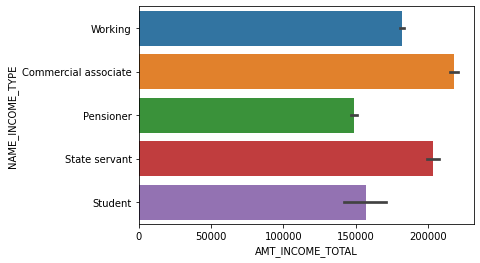

In [ ]:
#'AMT_INCOME_TOTAL': Annual Income & income type
# 범주형데이터 중 순서형 변수로 변경

sns.barplot (x=df.AMT_INCOME_TOTAL, y=df.NAME_INCOME_TYPE)
plt.show();

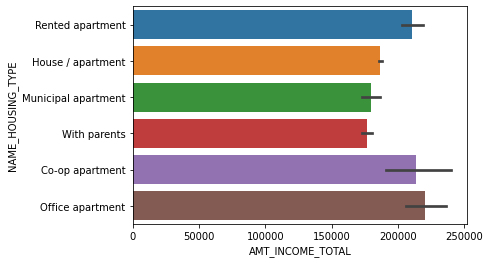

In [ ]:
#'AMT_INCOME_TOTAL': Annual Income & housing type 
# 범주형데이터 중 순서형 변수로 변경

sns.barplot (x=df.AMT_INCOME_TOTAL, y=df.NAME_HOUSING_TYPE)
plt.show();

0        33.0
1        33.0
2        59.0
3        52.0
4        52.0
         ... 
36452    48.0
36453    34.0
36454    34.0
36455    49.0
36456    25.0
Name: AGE_YEARS, Length: 36457, dtype: float64

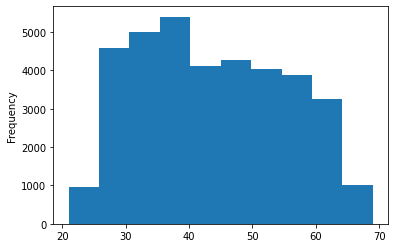

In [ ]:
#'DAYS_BIRTH': Birthday(Count backwards from current day eg. 01 means yday)
# 단위 변환 
df['DAYS_BIRTH'] = round(df['DAYS_BIRTH']/-365, 0)
df['DAYS_BIRTH'].plot(kind='hist', density=False);
df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)
df['AGE_YEARS']

In [ ]:
#'FLAG_WORK_PHONE': Work phone own => Employed Y/N랑 연관 그래서 drop
df = df.drop(columns=['FLAG_WORK_PHONE'])
#'FLAG_PHONE': Phone own => 모두 갖고 있음으로 drop
df = df.drop(columns=['FLAG_PHONE'])
#'FLAG_EMAIL': Email own => Email과 신용카드 발급 승인 여부 무관할 것으로 판단
df = df.drop(columns=['FLAG_EMAIL'])
#'ID': ID 삭제
df = df.drop(columns=['ID'])

In [ ]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,427500.0,Working,Higher education,Rented apartment,33.0,-4542,2.0,0
1,1,1,1,0,427500.0,Working,Higher education,Rented apartment,33.0,-4542,2.0,0
2,1,1,1,0,112500.0,Working,Secondary / secondary special,House / apartment,59.0,-1134,2.0,0
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,52.0,-3051,1.0,0
4,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,52.0,-3051,1.0,0


In [ ]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0

df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

df['DAYS_EMPLOYED'] = abs(round(df['DAYS_EMPLOYED']/-365,0))
df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


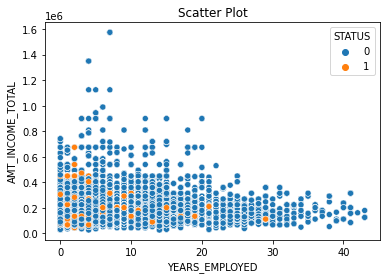

In [ ]:
sns.scatterplot(df['YEARS_EMPLOYED'], df['AMT_INCOME_TOTAL'], hue=df['STATUS'])
plt.title('Scatter Plot')
plt.show()

In [ ]:
df.corr()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
CODE_GENDER,1.000000,0.361379,-0.050758,0.077690,0.197805,-0.202398,-0.032177,0.110782,0.013739
FLAG_OWN_CAR,0.361379,1.000000,-0.015185,0.105839,0.215506,-0.156772,0.006563,0.151814,-0.000582
FLAG_OWN_REALTY,-0.050758,-0.015185,1.000000,-0.000575,0.032719,0.130286,-0.033512,-0.005723,-0.005610
CNT_CHILDREN,0.077690,0.105839,-0.000575,1.000000,0.033691,-0.339085,0.043104,0.889114,-0.000501
AMT_INCOME_TOTAL,0.197805,0.215506,0.032719,0.033691,1.000000,-0.067666,0.087344,0.023750,0.009730
AGE_YEARS,-0.202398,-0.156772,0.130286,-0.339085,-0.067666,1.000000,-0.022332,-0.303801,-0.005167
YEARS_EMPLOYED,-0.032177,0.006563,-0.033512,0.043104,0.087344,-0.022332,1.000000,0.054238,-0.006665
CNT_FAM_MEMBERS,0.110782,0.151814,-0.005723,0.889114,0.023750,-0.303801,0.054238,1.000000,0.001238
STATUS,0.013739,-0.000582,-0.005610,-0.000501,0.009730,-0.005167,-0.006665,0.001238,1.000000


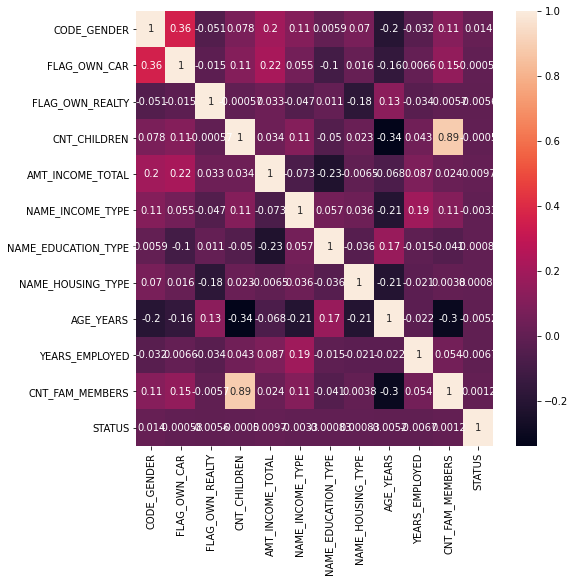

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

cat_columns = df.columns[(df.dtypes =='object').values].tolist()
cat_columns

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        df[col] = globals()['LE_{}'.format(col)].fit_transform(df[col])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,427500.0,4,1,4,33.0,12.0,2.0,0
1,1,1,1,0,427500.0,4,1,4,33.0,12.0,2.0,0
2,1,1,1,0,112500.0,4,4,1,59.0,3.0,2.0,0
3,0,0,1,0,270000.0,0,4,1,52.0,8.0,1.0,0
4,0,0,1,0,270000.0,0,4,1,52.0,8.0,1.0,0


In [ ]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)
    

NAME_INCOME_TYPE   :  ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
NAME_EDUCATION_TYPE   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_HOUSING_TYPE   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


In [ ]:
'''
채무 불이행자에 대한 기준은 기관의 기준에 따라 달라질 수 있지만, 
정해준 기준에 따라 방식.

선형회귀로 추정한다.
최상의 OLS 추정치를 얻기 위해서는 정규 분포를 가져아 합니다.
'''

'\n채무 불이행자에 대한 기준은 기관의 기준에 따라 달라질 수 있지만, \n정해준 기준에 따라 방식.\n\n선형회귀로 추정한다.\n최상의 OLS 추정치를 얻기 위해서는 정규 분포를 가져아 합니다.\n'

In [ ]:
'''
**4) 머신러닝 방식 적용 및 교차검증**

모델링과 베이스라인 성능 비교
Linear / Tree-based / Ensemble 모델을 학습 (다양하게 시도 ㅊㅊ)
평가지표 베이스라인과 비교
교차 검증 통해 일반화될 가능성 확인
모델 성능을 개선 o Hyperparameter tuning, etc.
최소 2개 이상의 모델을 만들어서 validation 점수를 보고
최종 모델의 test 점수를 보고하세요.
모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
최종 모델에 관해 설명하세요.
'''

'\n**4) 머신러닝 방식 적용 및 교차검증**\n\n모델링과 베이스라인 성능 비교\nLinear / Tree-based / Ensemble 모델을 학습 (다양하게 시도 ㅊㅊ)\n평가지표 베이스라인과 비교\n교차 검증 통해 일반화될 가능성 확인\n모델 성능을 개선 o Hyperparameter tuning, etc.\n최소 2개 이상의 모델을 만들어서 validation 점수를 보고\n최종 모델의 test 점수를 보고하세요.\n모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?\n모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?\n최종 모델에 관해 설명하세요.\n'

In [ ]:
#모델링과 베이스라인 성능 비교

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, test_size=0.2)
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train, val = train_test_split(train, train_size=0.8, test_size=0.2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)

target = 'STATUS'
features = df.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

train shape:  (29165, 12)
test shape:  (7292, 12)
train shape:  (23332, 12)
val shape:  (5833, 12)


In [ ]:
print(X_train.shape, y_train.shape)

(23332, 11) (23332,)


In [ ]:
'''
#(분류문제의 기준모델) 범주 0 (majority class)으로 모든 예측을 수행해 보겠습니다.

major = df['STATUS'].mode()
print(major)

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
X_pred = [major] * len(X_train)

# 이렇게 기준모델로 최다 비율 클래스를 사용할 경우 정확도를 구해 봅시다.
# 최다 클래스의 빈도가 정확도가 됩니다.

from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(X_train, X_pred))

X_pred = [major] * len(X_val)
print("validation accuracy: ", accuracy_score(X_val, X_pred))


#Classification metrics can't handle a mix of continuous-multioutput and binary targets
#=> 그리하여 randomforest을 베이스 모델로 선정, 그리고 parameter 고치는 방향으로 진행 
'''

'\n#(분류문제의 기준모델) 범주 0 (majority class)으로 모든 예측을 수행해 보겠습니다.\n\nmajor = df[\'STATUS\'].mode()\nprint(major)\n\n# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측\nX_pred = [major] * len(X_train)\n\n# 이렇게 기준모델로 최다 비율 클래스를 사용할 경우 정확도를 구해 봅시다.\n# 최다 클래스의 빈도가 정확도가 됩니다.\n\nfrom sklearn.metrics import accuracy_score\nprint("training accuracy: ", accuracy_score(X_train, X_pred))\n\nX_pred = [major] * len(X_val)\nprint("validation accuracy: ", accuracy_score(X_val, X_pred))\n\n\n#Classification metrics can\'t handle a mix of continuous-multioutput and binary targets\n#=> 그리하여 randomforest을 베이스 모델로 선정, 그리고 parameter 고치는 방향으로 진행 \n'

In [ ]:
# logistic regression 부터
#!pip install category_encoders
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,balanced_accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = LogisticRegression
pipe_log = make_pipeline(
OrdinalEncoder(),
StandardScaler(),
model()
)
pipe_log.fit(X_train, y_train)

print('훈련 정확도: ', pipe_log.score(X_train, y_train))
print('검증 정확도', pipe_log.score(X_val, y_val))


y_pred = pipe_log.predict(X_test)
print('\n Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n Classification report:')
print(classification_report(y_test, y_pred))

# 학습데이터의 이상 맞추면서 검증세트의 정확도는 다수범주(0)의 비율과 같게 나오는 것을 확인 할 수 있음
#=> 과적합

훈련 정확도:  0.9890708040459455
검증 정확도 0.9909137665009429

 Confusion matrix:
[[7218    0]
 [  74    0]]

 Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7218
           1       0.00      0.00      0.00        74

    accuracy                           0.99      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.98      0.99      0.98      7292



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier


pipe_det = make_pipeline(
OrdinalEncoder(),
SimpleImputer(),
DecisionTreeClassifier(random_state=10, max_depth=15, class_weight="balanced"))

pipe_det.fit(X_train, y_train)

print('훈련 정확도: ', pipe_det.score(X_train, y_train))
print('검증 정확도', pipe_det.score(X_val, y_val))

y_pred = pipe_det.predict(X_test)
print('\n Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n Classification report:')
print(classification_report(y_test, y_pred))


훈련 정확도:  0.870049717126693
검증 정확도 0.8638779358820504

 Confusion matrix:
[[6248  970]
 [  61   13]]

 Classification report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      7218
           1       0.01      0.18      0.02        74

    accuracy                           0.86      7292
   macro avg       0.50      0.52      0.47      7292
weighted avg       0.98      0.86      0.91      7292



In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_raf = make_pipeline(
OrdinalEncoder(),
SimpleImputer(),
RandomForestClassifier(random_state=10, max_depth=15, class_weight="balanced"))

pipe_raf.fit(X_train, y_train)

print('훈련 정확도: ', pipe_raf.score(X_train, y_train))
print('검증 정확도', pipe_raf.score(X_val, y_val))

y_pred = pipe_raf.predict(X_test)
print('\n Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n Classification report:')
print(classification_report(y_test, y_pred))


훈련 정확도:  0.9721841248071318
검증 정확도 0.9651980113149323

 Confusion matrix:
[[7016  202]
 [  65    9]]

 Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7218
           1       0.04      0.12      0.06        74

    accuracy                           0.96      7292
   macro avg       0.52      0.55      0.52      7292
weighted avg       0.98      0.96      0.97      7292



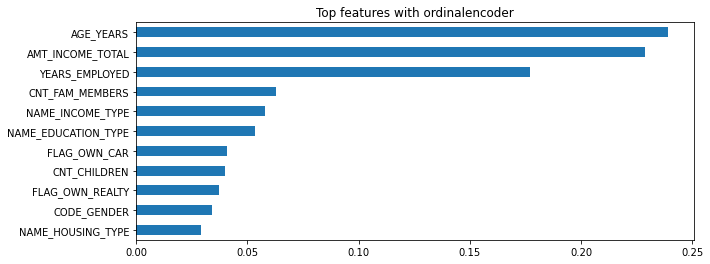

In [ ]:
#랜덤포레스트에서 확인 가능한 특성중요도를 확인, 특성중요도를 통해 특성이 얼마나 일찍 그리고 자주 분기에 사용되는 것을 확인 가능

# 특성 중요도(ordinal)
raf_ord = pipe_raf.named_steps['randomforestclassifier']
importances_ord = pd.Series(raf_ord.feature_importances_, X_train.columns)
plt.figure(figsize=(10,4))
plt.title(f'Top features with ordinalencoder')
importances_ord.sort_values()[:].plot.barh();

In [ ]:
# XGBoost  classification

from xgboost import XGBClassifier
from xgboost import XGBClassifier

pipe_xgb = make_pipeline(
OrdinalEncoder(),
XGBClassifier(n_estimators=200
, random_state=2
, n_jobs=-1
, max_depth=7
, learning_rate=0.2
)
)
pipe_xgb.fit(X_train, y_train)

print('훈련 정확도: ', pipe_xgb.score(X_train, y_train))
print('검증 정확도', pipe_xgb.score(X_val, y_val))

y_pred = pipe_xgb.predict(X_test)
print('\n Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n Classification report:')
print(classification_report(y_test, y_pred))

훈련 정확도:  0.9915566603805932
검증 정확도 0.9898851362935025

 Confusion matrix:
[[7208   10]
 [  71    3]]

 Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7218
           1       0.23      0.04      0.07        74

    accuracy                           0.99      7292
   macro avg       0.61      0.52      0.53      7292
weighted avg       0.98      0.99      0.99      7292



In [ ]:
#속상 ㅠ 파라미터를 바꿔보자

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터
model = XGBClassifier(
n_estimators=1000, # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
max_depth=7, # default=3, high cardinality 특성을 위해 기본보다 높여 보았습니다.
learning_rate=0.2,
# scale_pos_weight=ratio, # imbalance 데이터 일 경우 비율을 적용합니다.
n_jobs=-1
)
eval_set = [(X_train_encoded, y_train),
(X_val_encoded, y_val)]
model.fit(X_train_encoded, y_train,
eval_set=eval_set,
eval_metric='error', # #(wrong cases)/#(all cases)
early_stopping_rounds=50
)

print('검증 정확도', model.score(X_val_encoded, y_val))
print(classification_report(y_val, model.predict(X_val_encoded)))



[0]	validation_0-error:0.010929	validation_1-error:0.009086
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.010929	validation_1-error:0.009086
[2]	validation_0-error:0.010929	validation_1-error:0.009086
[3]	validation_0-error:0.010929	validation_1-error:0.009086
[4]	validation_0-error:0.010929	validation_1-error:0.009086
[5]	validation_0-error:0.010929	validation_1-error:0.009086
[6]	validation_0-error:0.010929	validation_1-error:0.009086
[7]	validation_0-error:0.010929	validation_1-error:0.009086
[8]	validation_0-error:0.010929	validation_1-error:0.009086
[9]	validation_0-error:0.010929	validation_1-error:0.009086
[10]	validation_0-error:0.010929	validation_1-error:0.009086
[11]	validation_0-error:0.010929	validation_1-error:0.009086
[12]	validation_0-error:0.010929	validation_1-error:0.009086
[13]	validation_0-error:0.010929	validation_1-error:0.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Model Accuracy 각각 나열하기 

In [ ]:
#data balancing 도전 

from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(MMS.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)



In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

#train data oversampling 바꾸기
X_train_over, y_train_over = oversample.fit_resample(X_train_scaled, y_train)
print(Counter(y_train_over))

#val data oversampling 바꾸기
X_val_over, y_val_over = oversample.fit_resample(X_val_scaled, y_val)
print(Counter(y_val_over))

#test data oversampling 바꾸기
X_test_over, y_test_over = oversample.fit_resample(X_test_scaled, y_test)
print(Counter(y_test_over))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Counter({0: 23077, 1: 23077})
Counter({0: 5780, 1: 5780})
Counter({0: 7218, 1: 7218})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pipe_log = make_pipeline(
OrdinalEncoder(),
StandardScaler(),
LogisticRegression()
)
pipe_log.fit(X_train_over, y_train_over)

print('훈련 정확도: ', pipe_log.score(X_train_over, y_train_over))
print('검증 정확도', pipe_log.score(X_val_over, y_val_over))


y_pred = pipe_log.predict(X_test_over)
print('\n Confusion matrix:')
print(confusion_matrix(y_test_over, y_pred))

print('\n Classification report:')
print(classification_report(y_test_over, y_pred))


훈련 정확도:  0.568336438878537
검증 정확도 0.46695501730103806

 Confusion matrix:
[[3787 3431]
 [4288 2930]]

 Classification report:
              precision    recall  f1-score   support

           0       0.47      0.52      0.50      7218
           1       0.46      0.41      0.43      7218

    accuracy                           0.47     14436
   macro avg       0.46      0.47      0.46     14436
weighted avg       0.46      0.47      0.46     14436



In [ ]:
from sklearn.tree import DecisionTreeClassifier


pipe_det = make_pipeline(
OrdinalEncoder(),
SimpleImputer(),
DecisionTreeClassifier(random_state=10, max_depth=15, class_weight="balanced"))

pipe_det.fit(X_train_over, y_train_over)

print('훈련 정확도: ', pipe_det.score(X_train_over, y_train_over))
print('검증 정확도', pipe_det.score(X_val_over, y_val_over))

y_pred = pipe_det.predict(X_test_over)
print('\n Confusion matrix:')
print(confusion_matrix(y_test_over, y_pred))

print('\n Classification report:')
print(classification_report(y_test_over, y_pred))


훈련 정확도:  0.9716384278719071
검증 정확도 0.8890138408304499

 Confusion matrix:
[[7001  217]
 [1978 5240]]

 Classification report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      7218
           1       0.96      0.73      0.83      7218

    accuracy                           0.85     14436
   macro avg       0.87      0.85      0.85     14436
weighted avg       0.87      0.85      0.85     14436



In [ ]:
dfz=pd.DataFrame({'features':X_train_over.columns,'importances':tree.feature_importances_})
dfz.sort_values('importances',inplace=True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importances',x='features',color='brown', figsize=(12,22))

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_raf = make_pipeline(
OrdinalEncoder(),
SimpleImputer(),
RandomForestClassifier(random_state=10, max_depth=15, class_weight="balanced"))

pipe_raf.fit(X_train_over, y_train_over)

print('훈련 정확도: ', pipe_raf.score(X_train_over, y_train_over))
print('검증 정확도', pipe_raf.score(X_val_over, y_val_over))

y_pred = pipe_raf.predict(X_test_over)
print('\n Confusion matrix:')
print(confusion_matrix(y_test_over, y_pred))

print('\n Classification report:')
print(classification_report(y_test_over, y_pred))


훈련 정확도:  0.9798934003553321
검증 정확도 0.8444636678200692

 Confusion matrix:
[[7000  218]
 [2152 5066]]

 Classification report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.86      7218
           1       0.96      0.70      0.81      7218

    accuracy                           0.84     14436
   macro avg       0.86      0.84      0.83     14436
weighted avg       0.86      0.84      0.83     14436



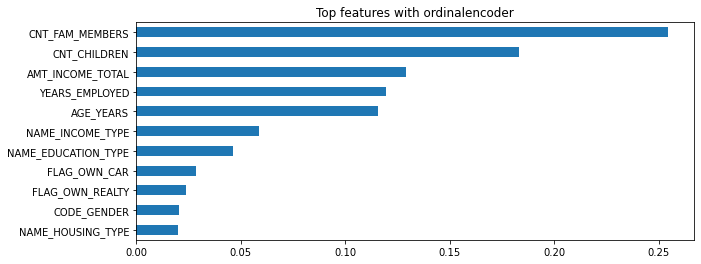

In [ ]:
raf_ord = pipe_raf.named_steps['randomforestclassifier']
importances_ord = pd.Series(raf_ord.feature_importances_, X_train.columns)
plt.figure(figsize=(10,4))
plt.title(f'Top features with ordinalencoder')
importances_ord.sort_values()[:].plot.barh();

In [ ]:
# XGBoost  classification
from xgboost import XGBClassifier

pipe_xgb = make_pipeline(
OrdinalEncoder(),
XGBClassifier(n_estimators=200
, random_state=2
, n_jobs=-1
, max_depth=7
, learning_rate=0.2
)
)
pipe_xgb.fit(X_train_over, y_train_over)

print('훈련 정확도: ', pipe_xgb.score(X_train_over, y_train_over))
print('검증 정확도', pipe_xgb.score(X_val_over, y_val_over))

y_pred = pipe_xgb.predict(X_test_over)
print('\n Confusion matrix:')
print(confusion_matrix(y_test_over, y_pred))

print('\n Classification report:')
print(classification_report(y_test_over, y_pred))

훈련 정확도:  0.9944750184166052
검증 정확도 0.9686851211072665

 Confusion matrix:
[[7191   27]
 [ 616 6602]]

 Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7218
           1       1.00      0.91      0.95      7218

    accuracy                           0.96     14436
   macro avg       0.96      0.96      0.96     14436
weighted avg       0.96      0.96      0.96     14436



Text(0.5, 1.0, 'Confusion matrix, n = 11560')

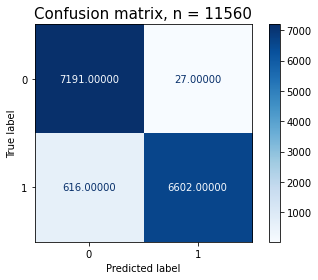

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_xgb, X_test_over, y_test_over,
cmap=plt.cm.Blues, values_format = '.5f',
ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val_over)}', fontsize=15)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


models = {}

models['log'] = LogisticRegression()
models['det'] = DecisionTreeClassifier()
models['raf'] = RandomForestClassifier()
models['xgb'] = XGBClassifier()


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(name, accuracy)

log 0.989851892484915
det 0.9871091607240812
raf 0.9883433900164564
xgb 0.989851892484915


In [ ]:
for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_test_over)
    accuracy = accuracy_score(y_test_over,y_pred)
    print(name, accuracy)

log 0.46404821280133
det 0.8605569409808811
raf 0.8299390412856748
xgb 0.8706705458575783


In [ ]:
#범위내의 정확도를 가진 모델의 성능 평가
# 정확도의 역설을 피하기 위해

for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_test_over)
    classification = classification_report(y_test_over,y_pred)
    print(name, classification)

#정확도가 어떻게 모델 선택을 오도할 수 있는지 확인하십시오. 
#개인을 가능한 채무 불이행자로 분류할 수 있는 유일한 사람(리콜)은 KNN(18%), Beysian(4%), Ada(11%), Gda(18%)였습니다. 
#즉, 제안된 기반의 전체 채무 불이행자 수 중 4개 모델만 이 분류에 성공했습니다. 
# 나머지는 모두 채무불이행자만을 예측할 수 있었으며, 이는 본 연구의 분석 목적이 아니다.
#

log               precision    recall  f1-score   support

           0       0.47      0.52      0.49      7218
           1       0.46      0.40      0.43      7218

    accuracy                           0.46     14436
   macro avg       0.46      0.46      0.46     14436
weighted avg       0.46      0.46      0.46     14436

det               precision    recall  f1-score   support

           0       0.78      0.99      0.88      7218
           1       0.99      0.73      0.84      7218

    accuracy                           0.86     14436
   macro avg       0.89      0.86      0.86     14436
weighted avg       0.89      0.86      0.86     14436

raf               precision    recall  f1-score   support

           0       0.75      0.99      0.86      7218
           1       0.99      0.67      0.80      7218

    accuracy                           0.83     14436
   macro avg       0.87      0.83      0.83     14436
weighted avg       0.87      0.83      0.83     14436

xgb    

In [ ]:
# 모델의 재현율을 분석하는 것이 얼마나 중요할까?

# 신용 카드 회사는 고객의 신용 카드 발급 여부를 결정할때에는, 
# 정확성만 분석하면 안될 것이다. 실제로 신용 분석에서 정확도는 매우 작은 부분 중 하나일 것.
# 기관의 내부 여건상 금융 상품의 활용에는 어느 정도의 리스크가 존재하고, 
# 회사의 기준에 따라 신청자의 신용 카드 발급 여부는 매우 달라질 수 있다.
# 그렇기에 연체 또는 부채 상환하지 않을 확률을 아는 것은 매우 중요할 것 이다.
# 예를 들어 은행 X는 채무 불이행 가능성이 30% 이상인 고객에게는 
# 신용 카드한도를 늘리지 않을 것입니다.
# 누가 신용을 받을지 여부를 결정할 때 모델의 최상의 성능을 제공하는 것은
# 정학성이 아니라, ROC, AUC에 의해 구해지는 컷으로 기준을 잡아야 합니다.
# 이를 위해 AUC를 구해보자.
'''
분류문제에서 모델을 올바르게 평가하기 위해서는 정확도 외에도 정밀도, 재현율 을 잘 이해하고 사용해야 한다는 것을
알았습니다. 특히 각 범주를 예측하는 기준이 되는 임계값의 위치에 따라 정밀도나 재현율이 달라지기 때문에 문제의 상
황에 따라 적절한 임계값을 선택할 필요성이 있습니다. 이진 분류문제에서는 ROC curve와 AUC 점수를 잘 활용하면 좋은
결과를 만들어낼 수 있을 것 입니다.
'''


'\n분류문제에서 모델을 올바르게 평가하기 위해서는 정확도 외에도 정밀도, 재현율 을 잘 이해하고 사용해야 한다는 것을\n알았습니다. 특히 각 범주를 예측하는 기준이 되는 임계값의 위치에 따라 정밀도나 재현율이 달라지기 때문에 문제의 상\n황에 따라 적절한 임계값을 선택할 필요성이 있습니다. 이진 분류문제에서는 ROC curve와 AUC 점수를 잘 활용하면 좋은\n결과를 만들어낼 수 있을 것 입니다.\n'